✓ Файл загружен
✓ Найдена колонка: 'Сумма'
✓ Обработано записей: 77046
✓ Удалено отрицательных значений: 793 (1.0%)

ТЕСТ ПЕРВОЙ ЦИФРЫ
Объем выборки: 76192
MAD: 0.0222 - Несоответствие
Хи-квадрат: 6650.35
Критическое значение хи-квадрат (95%): 15.51
Соответствие: НЕТ

Цифра  Кол-во   Факт.%   Ожид.%   Z-стат   Соотв.
-------------------------------------------------------
1      22840    29.98    30.10    0.75     ДА
2      11114    14.59    17.61    21.90    НЕТ
3      9449     12.40    12.49    0.77     ДА
4      10478    13.75    9.69     37.89    НЕТ
5      10534    13.83    7.92     60.38    НЕТ
6      3262     4.28     6.69     26.65    НЕТ
7      3366     4.42     5.80     16.31    НЕТ
8      2850     3.74     5.12     17.22    НЕТ
9      2299     3.02     4.58     20.58    НЕТ


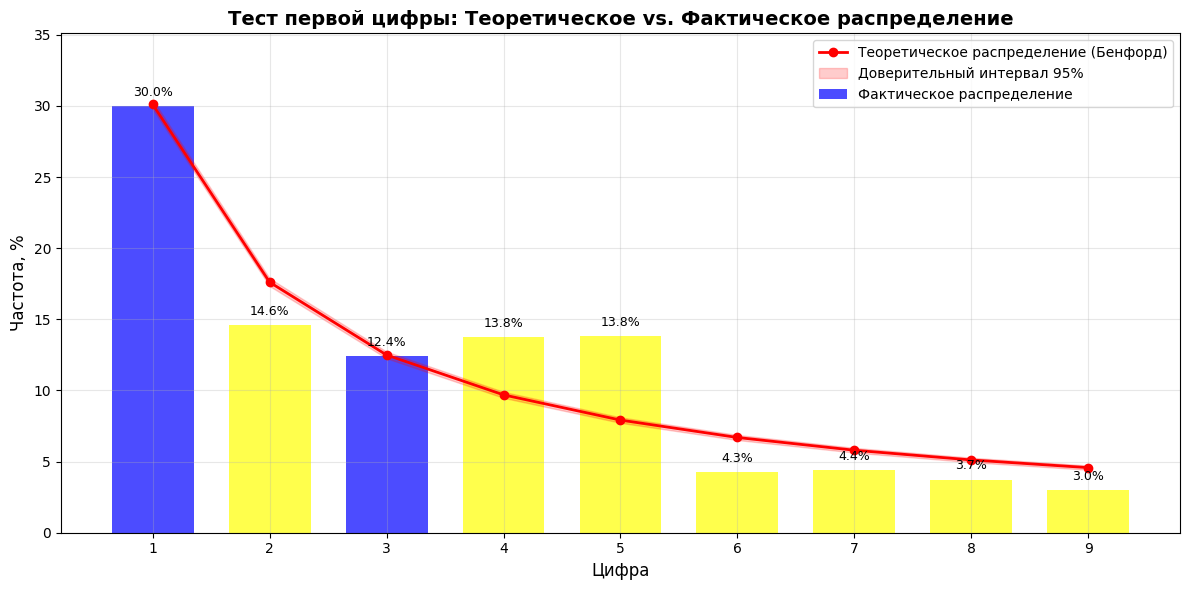


ТЕСТ ВТОРОЙ ЦИФРЫ
Объем выборки: 69898
MAD: 0.0308 - Несоответствие
Хи-квадрат: 8996.53
Критическое значение хи-квадрат (95%): 16.92
Соответствие: НЕТ

Цифра  Кол-во   Факт.%   Ожид.%   Z-стат   Соотв.
-------------------------------------------------------
0      6817     9.75     11.97    18.04    НЕТ
1      8782     12.56    11.39    9.77     НЕТ
2      9695     13.87    10.88    25.36    НЕТ
3      12734    18.22    10.43    67.32    НЕТ
4      4535     6.49     10.03    31.17    НЕТ
5      6124     8.76     9.67     8.10     НЕТ
6      5131     7.34     9.34     18.14    НЕТ
7      4169     5.96     9.04     28.31    НЕТ
8      3572     5.11     8.76     34.10    НЕТ
9      8339     11.93    8.50     32.52    НЕТ


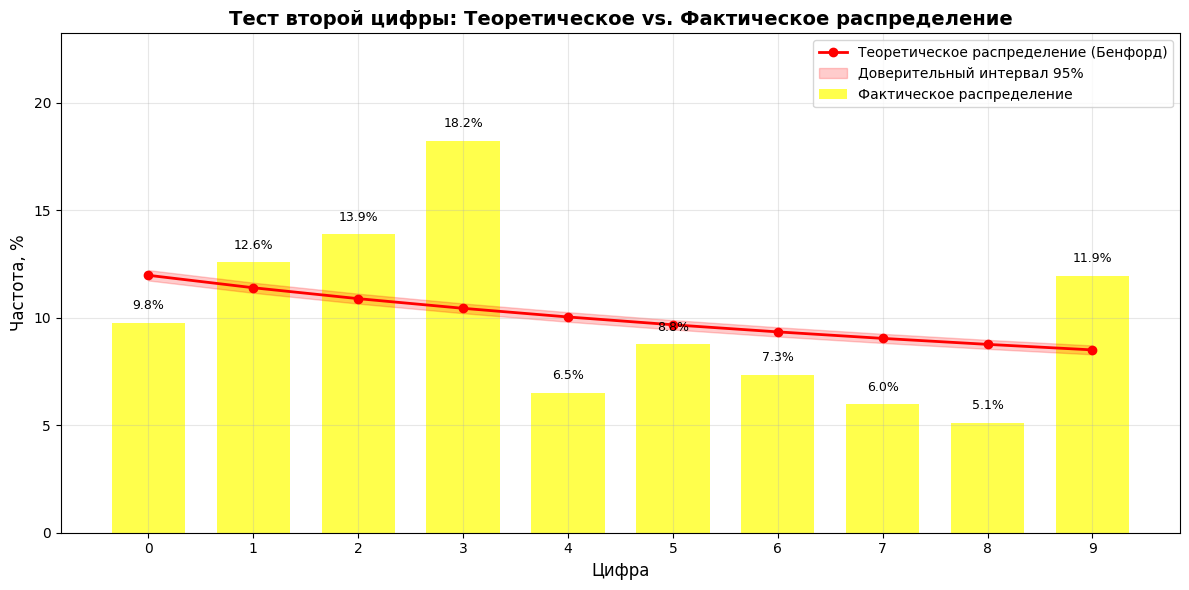


ТЕСТ ПЕРВЫХ ДВУХ ЦИФР
Объем выборки: 69898
MAD: 0.005436 - Несоответствие
Хи-квадрат: 55445.11
Критическое значение хи-квадрат (95%): 113.15
Соответствие: НЕТ


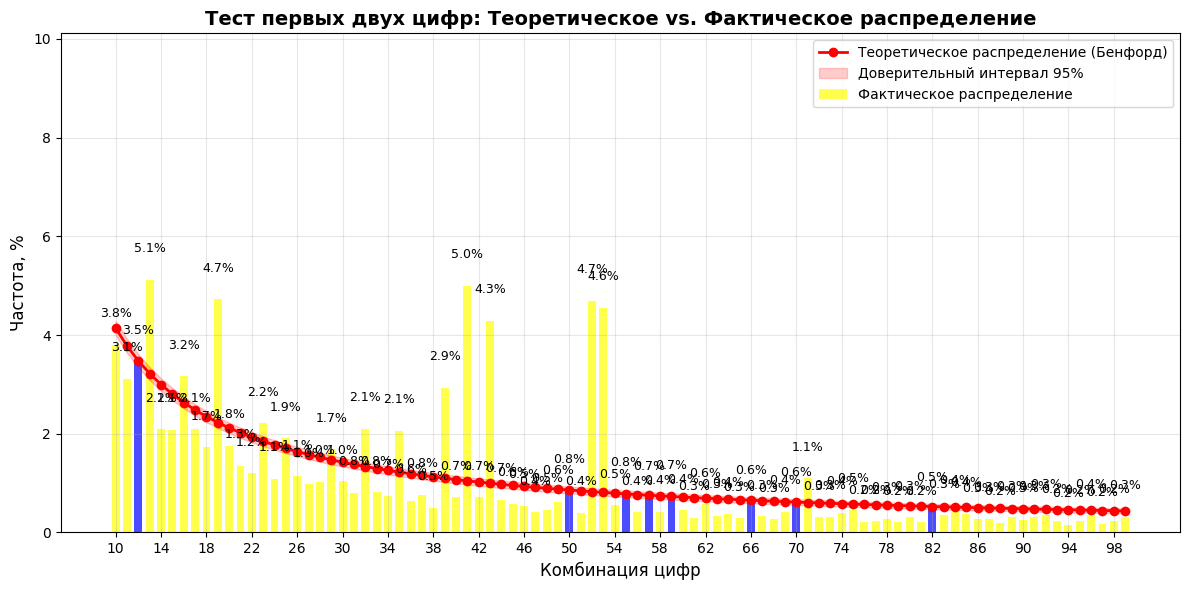


ТЕСТ ПОСЛЕДНИХ ДВУХ ЦИФР
Объем выборки: 77046
Хи-квадрат: 125925.80
Критическое значение хи-квадрат (95%): 123.23
Соответствие равномерному распределению: НЕТ


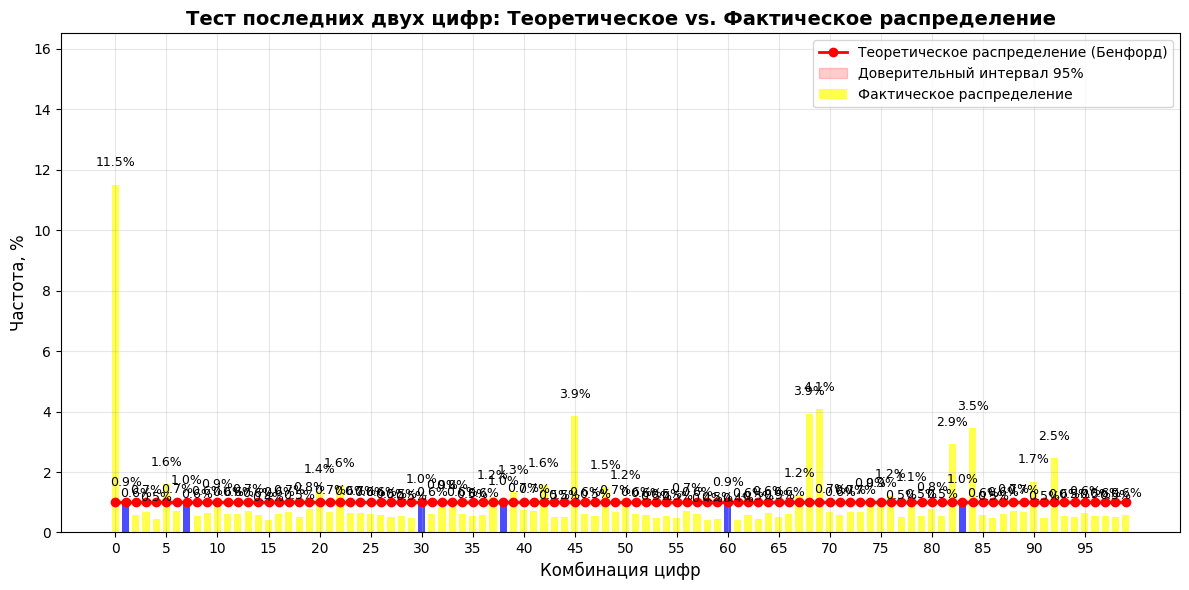

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats

def prepare_data():

    # Поиск колонки "сумма"
    amount_col = next((col for col in df.columns if str(col).strip().lower() == 'сумма'), None)
    amounts = pd.to_numeric(df[amount_col], errors='coerce').dropna()

    # Удаление отрицательных значений
    positive_amounts = amounts[amounts > 0]
    negative_count = len(amounts[amounts < 0])
    negative_percent = negative_count / len(amounts) * 100 if len(amounts) > 0 else 0

    print(f"✓ Обработано записей: {len(positive_amounts)}")
    print(f"✓ Удалено отрицательных значений: {negative_count} ({negative_percent:.1f}%)")

    return positive_amounts

def extract_first_digits(amounts):
    def get_first_digit(x):
        num_str = str(x).lstrip('-').replace(',', '').split('.')[0]
        return int(num_str[0]) if num_str and num_str[0].isdigit() and num_str[0] != '0' else None

    first_digits = amounts.apply(get_first_digit).dropna()
    return first_digits

def extract_second_digits(amounts):
    amounts_filtered = amounts[amounts > 10]

    def get_second_digit(x):
        num_str = str(x).lstrip('-').replace(',', '').split('.')[0]
        return int(num_str[1]) if len(num_str) >= 2 and num_str[1].isdigit() else None

    second_digits = amounts_filtered.apply(get_second_digit).dropna()
    return second_digits

def extract_first_two_digits(amounts):
    amounts_filtered = amounts[amounts > 10]

    def get_first_two_digits(x):
        num_str = str(x).lstrip('-').replace(',', '').split('.')[0]
        return int(num_str[:2]) if len(num_str) >= 2 else None

    first_two_digits = amounts_filtered.apply(get_first_two_digits).dropna()
    return first_two_digits

def extract_last_two_digits(amounts):

    def get_last_two_digits(x):
        try:
            num_str = str(float(x)).replace(',', '.')
            if '.' in num_str:
                parts = num_str.split('.')
                integer_part = parts[0]
                decimal_part = parts[1][:2].ljust(2, '0')
                return int(decimal_part)
            else:
                return 0
        except:
            return 0

    last_two_digits = amounts.apply(get_last_two_digits)
    return last_two_digits

def calculate_mad(actual_freq, expected_freq):
    return np.mean([abs(actual_freq[i] - expected_freq[i]) for i in range(len(actual_freq))])

def calculate_z_statistics(actual_freq, expected_freq, total_count):
    z_stats = []
    for i in range(len(actual_freq)):
        AP, EP = actual_freq[i], expected_freq[i]
        correction = 1/(2*total_count)
        numerator = abs(AP - EP) - correction
        denominator = math.sqrt((EP * (1 - EP)) / total_count)
        z_stats.append(numerator / denominator if numerator > 0 else 0)
    return z_stats

def calculate_chi_square(actual_freq, expected_freq, total_count):
    return sum([((actual_freq[i] - expected_freq[i])**2 / expected_freq[i]) for i in range(len(actual_freq))]) * total_count

def get_confidence_interval(expected_freq, total_count, confidence_level=0.95):
    z_value = stats.norm.ppf(1 - (1 - confidence_level) / 2)
    margin_of_error = z_value * np.sqrt(expected_freq * (1 - expected_freq) / total_count)
    lower_bound = np.maximum(expected_freq - margin_of_error, 0)
    upper_bound = np.minimum(expected_freq + margin_of_error, 1)
    return lower_bound, upper_bound

def plot_test_results(digits, actual_freq, expected_freq, test_name, total_count):
    plt.figure(figsize=(12, 6))

    # Расчет доверительного интервала
    lower_bound, upper_bound = get_confidence_interval(np.array(expected_freq), total_count)

    x = np.arange(len(digits))

    # Определение цветов столбцов (синий - в интервале, желтый - вне интервала)
    bar_colors = []
    for i in range(len(digits)):
        if lower_bound[i] <= actual_freq[i] <= upper_bound[i]:
            bar_colors.append('blue')
        else:
            bar_colors.append('yellow')

    # Столбцы для фактических частот (по центру под цифрами)
    bars = plt.bar(x, [f*100 for f in actual_freq], width=0.7,
                   label='Фактическое распределение', color=bar_colors, alpha=0.7)

    # Линия для теоретических значений (по центру под цифрами)
    plt.plot(x, [f*100 for f in expected_freq], 'ro-',
             label='Теоретическое распределение (Бенфорд)', linewidth=2, markersize=6)

    # Доверительный интервал
    plt.fill_between(x,
                    [f*100 for f in lower_bound],
                    [f*100 for f in upper_bound],
                    alpha=0.2, color='red', label='Доверительный интервал 95%')

    # Настройки графика
    plt.xlabel('Цифра' if test_name in ['first_digit', 'second_digit'] else 'Комбинация цифр', fontsize=12)
    plt.ylabel('Частота, %', fontsize=12)

    titles = {
        'first_digit': 'Тест первой цифры',
        'second_digit': 'Тест второй цифры',
        'first_two_digits': 'Тест первых двух цифр',
        'last_two_digits': 'Тест последних двух цифр'
    }
    plt.title(f'{titles.get(test_name, test_name)}: Теоретическое vs. Фактическое распределение',
              fontsize=14, fontweight='bold')

    # Настройки оси X для разных тестов
    if test_name == 'first_two_digits':
        # Для первых двух цифр: от 10 до 99 с шагом 1
        plt.xticks(x, digits)
        # Показывать каждую 5-ю метку для читаемости
        tick_indices = range(0, len(digits), max(1, len(digits)//20))
        plt.xticks([x[i] for i in tick_indices], [digits[i] for i in tick_indices])

    elif test_name == 'last_two_digits':
        # Для последних двух цифр: от 00 до 99 с шагом 1
        plt.xticks(x, digits)
        # Показывать каждую 5-ю метку для читаемости
        tick_indices = range(0, len(digits), max(1, len(digits)//20))
        plt.xticks([x[i] for i in tick_indices], [digits[i] for i in tick_indices])

    else:
        # Для первых и вторых цифр - обычные настройки
        plt.xticks(x, digits)

    plt.legend()
    plt.grid(True, alpha=0.3)

    # Добавление значений на столбцы
    for bar, actual in zip(bars, actual_freq):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

    plt.ylim(0, max([max(actual_freq)*100, max(expected_freq)*100]) + 5)
    plt.tight_layout()
    plt.show()

def get_mad_interpretation(mad, test_type):
    if test_type == 'first_digit':
        if mad <= 0.006: return "Близкое соответствие"
        elif mad <= 0.012: return "Приемлемое соответствие"
        elif mad <= 0.015: return "Предельно допустимое"
        else: return "Несоответствие"
    elif test_type == 'second_digit':
        if mad <= 0.008: return "Близкое соответствие"
        elif mad <= 0.010: return "Приемлемое соответствие"
        elif mad <= 0.012: return "Предельно допустимое"
        else: return "Несоответствие"
    elif test_type == 'first_two_digits':
        if mad <= 0.0012: return "Близкое соответствие"
        elif mad <= 0.0018: return "Приемлемое соответствие"
        elif mad <= 0.0022: return "Предельно допустимое"
        else: return "Несоответствие"
    else:
        return ""

def run_first_digit_test(amounts):
    """Запуск теста первой цифры"""
    print("\n" + "="*60)
    print("ТЕСТ ПЕРВОЙ ЦИФРЫ")
    print("="*60)

    # Извлечение данных
    first_digits = extract_first_digits(amounts)
    total = len(first_digits)

    digits = list(range(1, 10))
    actual_counts = [np.sum(first_digits == d) for d in digits]
    actual_freq = [count/total for count in actual_counts]

    # Ожидаемые частоты по Бенфорду
    expected_freq = [math.log10(1 + 1/d) for d in digits]

    # Расчет статистик
    mad = calculate_mad(actual_freq, expected_freq)
    z_stats = calculate_z_statistics(actual_freq, expected_freq, total)
    chi_square = calculate_chi_square(actual_freq, expected_freq, total)

    # Вывод результатов
    print(f"Объем выборки: {total}")
    print(f"MAD: {mad:.4f} - {get_mad_interpretation(mad, 'first_digit')}")
    print(f"Хи-квадрат: {chi_square:.2f}")
    print(f"Критическое значение хи-квадрат (95%): 15.51")
    print(f"Соответствие: {'ДА' if chi_square <= 15.51 else 'НЕТ'}")

    print(f"\n{'Цифра':<6} {'Кол-во':<8} {'Факт.%':<8} {'Ожид.%':<8} {'Z-стат':<8} {'Соотв.'}")
    print("-" * 55)

    for i, digit in enumerate(digits):
        status = "ДА" if z_stats[i] <= 1.96 else "НЕТ"
        print(f"{digit:<6} {actual_counts[i]:<8} {actual_freq[i]*100:<8.2f} {expected_freq[i]*100:<8.2f} {z_stats[i]:<8.2f} {status}")

    # Построение графика
    plot_test_results(digits, actual_freq, expected_freq, 'first_digit', total)

def run_second_digit_test(amounts):
    """Запуск теста второй цифры"""
    print("\n" + "="*60)
    print("ТЕСТ ВТОРОЙ ЦИФРЫ")
    print("="*60)

    # Извлечение данных
    second_digits = extract_second_digits(amounts)
    total = len(second_digits)

    digits = list(range(0, 10))
    actual_counts = [np.sum(second_digits == d) for d in digits]
    actual_freq = [count/total for count in actual_counts]

    # Ожидаемые частоты по Бенфорду для второй цифры
    expected_freq = []
    for d2 in range(0, 10):
        prob = sum([math.log10(1 + 1/(d1 * 10 + d2)) for d1 in range(1, 10)])
        expected_freq.append(prob)

    # Расчет статистик
    mad = calculate_mad(actual_freq, expected_freq)
    z_stats = calculate_z_statistics(actual_freq, expected_freq, total)
    chi_square = calculate_chi_square(actual_freq, expected_freq, total)

    # Вывод результатов
    print(f"Объем выборки: {total}")
    print(f"MAD: {mad:.4f} - {get_mad_interpretation(mad, 'second_digit')}")
    print(f"Хи-квадрат: {chi_square:.2f}")
    print(f"Критическое значение хи-квадрат (95%): 16.92")
    print(f"Соответствие: {'ДА' if chi_square <= 16.92 else 'НЕТ'}")

    print(f"\n{'Цифра':<6} {'Кол-во':<8} {'Факт.%':<8} {'Ожид.%':<8} {'Z-стат':<8} {'Соотв.'}")
    print("-" * 55)

    for i, digit in enumerate(digits):
        status = "ДА" if z_stats[i] <= 1.96 else "НЕТ"
        print(f"{digit:<6} {actual_counts[i]:<8} {actual_freq[i]*100:<8.2f} {expected_freq[i]*100:<8.2f} {z_stats[i]:<8.2f} {status}")

    # Построение графика
    plot_test_results(digits, actual_freq, expected_freq, 'second_digit', total)

def run_first_two_digits_test(amounts):
    """Запуск теста первых двух цифр"""
    print("\n" + "="*60)
    print("ТЕСТ ПЕРВЫХ ДВУХ ЦИФР")
    print("="*60)

    # Извлечение данных
    first_two_digits = extract_first_two_digits(amounts)
    total = len(first_two_digits)

    # Полный диапазон от 10 до 99
    digits = list(range(10, 100))
    actual_counts = [np.sum(first_two_digits == d) for d in digits]
    actual_freq = [count/total for count in actual_counts]

    # Ожидаемые частоты по Бенфорду для первых двух цифр
    expected_freq = [math.log10(1 + 1/d) for d in digits]

    # Расчет статистик
    mad = calculate_mad(actual_freq, expected_freq)
    chi_square = calculate_chi_square(actual_freq, expected_freq, total)

    # Вывод результатов
    print(f"Объем выборки: {total}")
    print(f"MAD: {mad:.6f} - {get_mad_interpretation(mad, 'first_two_digits')}")
    print(f"Хи-квадрат: {chi_square:.2f}")
    print(f"Критическое значение хи-квадрат (95%): 113.15")
    print(f"Соответствие: {'ДА' if chi_square <= 113.15 else 'НЕТ'}")

    # Построение графика со всеми цифрами от 10 до 99
    plot_test_results(digits, actual_freq, expected_freq, 'first_two_digits', total)

def run_last_two_digits_test(amounts):
    """Запуск теста последних двух цифр"""
    print("\n" + "="*60)
    print("ТЕСТ ПОСЛЕДНИХ ДВУХ ЦИФР")
    print("="*60)

    # Извлечение данных
    last_two_digits = extract_last_two_digits(amounts)
    total = len(last_two_digits)

    # Полный диапазон от 00 до 99
    digits = list(range(0, 100))
    actual_counts = [np.sum(last_two_digits == d) for d in digits]
    actual_freq = [count/total for count in actual_counts]

    # Ожидаемые частоты для последних двух цифр (равномерное распределение)
    expected_freq = [1/100] * 100

    # Расчет статистик
    z_stats = calculate_z_statistics(actual_freq, expected_freq, total)
    chi_square = calculate_chi_square(actual_freq, expected_freq, total)

    # Вывод результатов
    print(f"Объем выборки: {total}")
    print(f"Хи-квадрат: {chi_square:.2f}")
    print(f"Критическое значение хи-квадрат (95%): 123.23")
    print(f"Соответствие равномерному распределению: {'ДА' if chi_square <= 123.23 else 'НЕТ'}")

    # Построение графика со всеми цифрами от 00 до 99
    plot_test_results(digits, actual_freq, expected_freq, 'last_two_digits', total)

def main():

    # 1. Подготовка данных
    amounts = prepare_data()

    # 2. Запуск всех тестов
    run_first_digit_test(amounts)
    run_second_digit_test(amounts)
    run_first_two_digits_test(amounts)
    run_last_two_digits_test(amounts)

if __name__ == "__main__":
    main()

✓ Файл загружен
✓ Найдена колонка: 'Сумма'
✓ Обработано записей: 77046
✓ Удалено отрицательных значений: 793 (1.0%)

ТЕСТ ДУБЛИРОВАНИЯ СУММ
Общее количество операций: 77046
Уникальных сумм: 22202
Коэффициент дублирования: 28.82%

ТОП-20 НАИБОЛЕЕ ЧАСТОТНЫХ СУММ:
Сумма           Кол-во   Доля,%   Подозрительность
------------------------------------------------------------
419.69          2752     3.57     ВЫСОКАЯ
521.45          2462     3.20     ВЫСОКАЯ
433.68          2447     3.18     ВЫСОКАЯ
538.84          2196     2.85     ВЫСОКАЯ
3905.82         1642     2.13     ВЫСОКАЯ
1952.92         1442     1.87     ВЫСОКАЯ
1952.90         820      1.06     ВЫСОКАЯ
231.05          814      1.06     ВЫСОКАЯ
138.22          784      1.02     ВЫСОКАЯ
325.48          729      0.95     умеренная
1627.42         729      0.95     умеренная
3554.20         546      0.71     умеренная
7108.39         534      0.69     умеренная
133.76          514      0.67     умеренная
1386.30         343      0.4

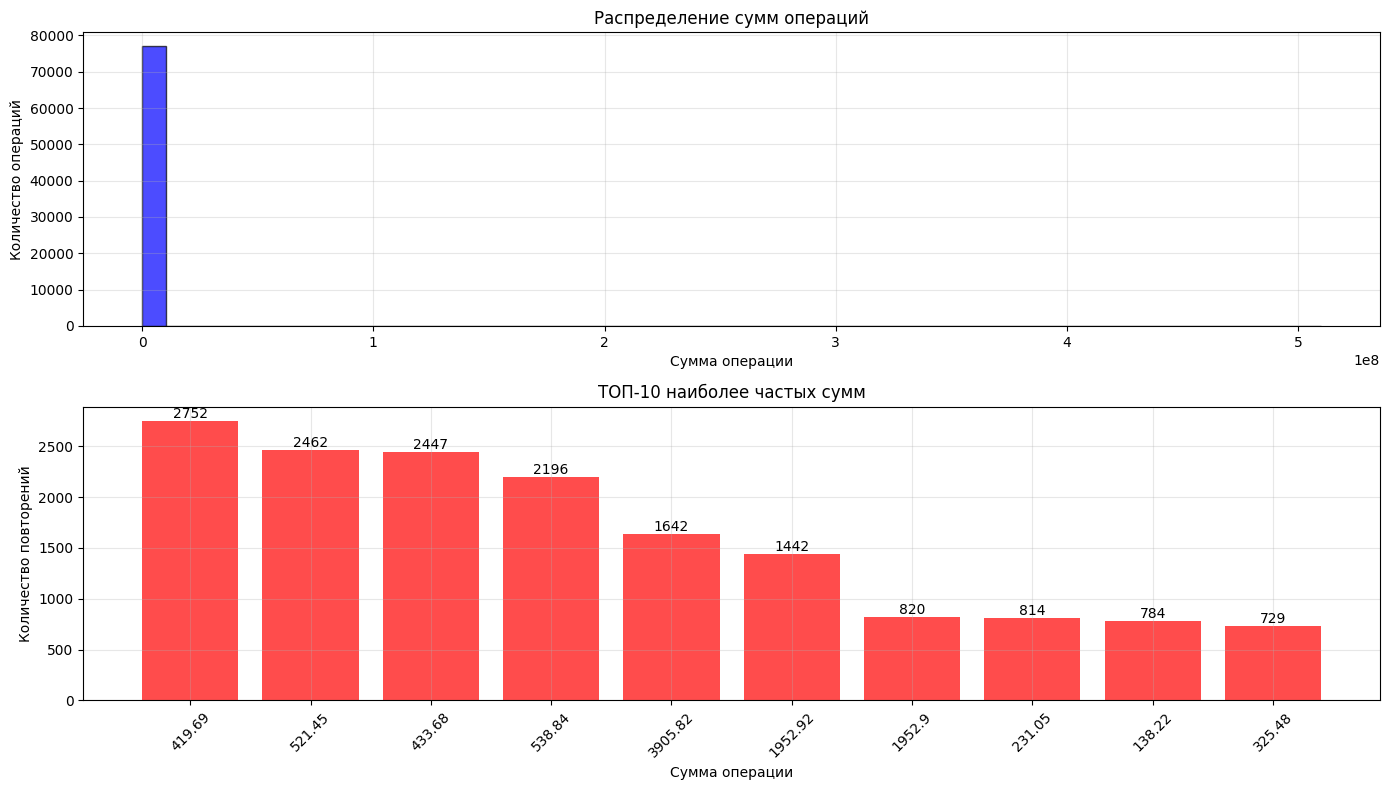


ПОДОЗРИТЕЛЬНЫЕ ГРУППЫ ОПЕРАЦИЙ:
Сумма           Кол-во   Доля,%   Риск
--------------------------------------------------
419.69          2752     3.57     ВЫСОКИЙ
521.45          2462     3.20     ВЫСОКИЙ
433.68          2447     3.18     ВЫСОКИЙ
538.84          2196     2.85     ВЫСОКИЙ
3905.82         1642     2.13     ВЫСОКИЙ
1952.92         1442     1.87     ПОВЫШЕННЫЙ
1952.90         820      1.06     ПОВЫШЕННЫЙ
231.05          814      1.06     ПОВЫШЕННЫЙ
138.22          784      1.02     ПОВЫШЕННЫЙ

АНАЛИЗ ПАТТЕРНОВ:
Наиболее частые окончания сумм (копейки):
  ...00: 8865 операций
  ...69: 3148 операций
  ...68: 3030 операций
  ...45: 2969 операций
  ...84: 2669 операций


In [17]:
def prepare_data():
    """
    Подготовка данных: чтение файла и удаление отрицательных значений
    """
    try:
        df = pd.read_excel('59.xlsx')
        print("✓ Файл загружен")
    except FileNotFoundError:
        print("✗ Файл 59.xlsx не найден")
        return None

    # Поиск колонки "сумма"
    amount_col = next((col for col in df.columns if str(col).strip().lower() == 'сумма'), None)
    if not amount_col:
        print("✗ Колонка 'сумма' не найдена")
        print("Доступные колонки:", df.columns.tolist())
        return None

    print(f"✓ Найдена колонка: '{amount_col}'")

    # Обработка данных
    amounts = pd.to_numeric(df[amount_col], errors='coerce').dropna()

    # Удаление отрицательных значений
    positive_amounts = amounts[amounts > 0]
    negative_count = len(amounts[amounts < 0])
    negative_percent = negative_count / len(amounts) * 100 if len(amounts) > 0 else 0

    print(f"✓ Обработано записей: {len(positive_amounts)}")
    print(f"✓ Удалено отрицательных значений: {negative_count} ({negative_percent:.1f}%)")

    return positive_amounts

def run_duplication_test(amounts):
    """Запуск теста дублирования сумм"""
    print("\n" + "="*60)
    print("ТЕСТ ДУБЛИРОВАНИЯ СУММ")
    print("="*60)

    if len(amounts) == 0:
        print("✗ Нет данных для теста дублирования сумм")
        return

    # Подсчет частот сумм
    amount_counts = amounts.value_counts().sort_values(ascending=False)
    total_operations = len(amounts)
    unique_amounts = len(amount_counts)

    print(f"Общее количество операций: {total_operations}")
    print(f"Уникальных сумм: {unique_amounts}")
    print(f"Коэффициент дублирования: {unique_amounts/total_operations:.2%}")

    # Топ-20 наиболее частых сумм
    top_duplicated = amount_counts.head(20)

    print(f"\nТОП-20 НАИБОЛЕЕ ЧАСТОТНЫХ СУММ:")
    print(f"{'Сумма':<15} {'Кол-во':<8} {'Доля,%':<8} {'Подозрительность'}")
    print("-" * 60)

    suspicious_threshold = total_operations * 0.01  # 1% от всех операций

    for amount, count in top_duplicated.items():
        percentage = (count / total_operations) * 100
        suspicion = "ВЫСОКАЯ" if count > suspicious_threshold else "умеренная"
        print(f"{amount:<15.2f} {count:<8} {percentage:<8.2f} {suspicion}")

    # Анализ круглых сумм
    print(f"\nАНАЛИЗ КРУГЛЫХ СУММ:")
    round_amounts = {
        'Круглые тысячи': amounts[amounts % 1000 == 0],
        'Круглые сотни': amounts[(amounts % 100 == 0) & (amounts % 1000 != 0)],
        'Круглые десятки': amounts[(amounts % 10 == 0) & (amounts % 100 != 0)]
    }

    for category, round_amts in round_amounts.items():
        if len(round_amts) > 0:
            percentage = (len(round_amts) / total_operations) * 100
            print(f"{category}: {len(round_amts)} операций ({percentage:.1f}%)")

    # Построение гистограммы
    plot_duplication_histogram(amounts, top_duplicated)

    # Детальный анализ подозрительных групп
    analyze_suspicious_groups(amounts, amount_counts, suspicious_threshold)

def plot_duplication_histogram(amounts, top_duplicated):
    """Построение гистограммы дублирования сумм"""
    plt.figure(figsize=(14, 8))

    # Гистограмма распределения сумм
    plt.subplot(2, 1, 1)
    plt.hist(amounts, bins=50, alpha=0.7, color='blue', edgecolor='black')
    plt.xlabel('Сумма операции')
    plt.ylabel('Количество операций')
    plt.title('Распределение сумм операций')
    plt.grid(True, alpha=0.3)

    # График топ дублированных сумм
    plt.subplot(2, 1, 2)
    top_amounts = [str(amount) for amount in top_duplicated.index[:10]]
    top_counts = top_duplicated.values[:10]

    bars = plt.bar(range(len(top_amounts)), top_counts, color='red', alpha=0.7)
    plt.xlabel('Сумма операции')
    plt.ylabel('Количество повторений')
    plt.title('ТОП-10 наиболее частых сумм')
    plt.xticks(range(len(top_amounts)), top_amounts, rotation=45)

    # Добавление значений на столбцы
    for bar, count in zip(bars, top_counts):
        plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.1,
                f'{count}', ha='center', va='bottom')

    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def analyze_suspicious_groups(amounts, amount_counts, suspicious_threshold):
    """Анализ подозрительных групп операций"""
    print(f"\nПОДОЗРИТЕЛЬНЫЕ ГРУППЫ ОПЕРАЦИЙ:")
    print("=" * 50)

    high_risk_operations = amount_counts[amount_counts > suspicious_threshold]

    if len(high_risk_operations) == 0:
        print("Операций с высокой подозрительностью не обнаружено")
        return

    print(f"{'Сумма':<15} {'Кол-во':<8} {'Доля,%':<8} {'Риск'}")
    print("-" * 50)

    for amount, count in high_risk_operations.items():
        percentage = (count / len(amounts)) * 100

        # Определение уровня риска
        if percentage > 5:
            risk_level = "ОЧЕНЬ ВЫСОКИЙ"
        elif percentage > 2:
            risk_level = "ВЫСОКИЙ"
        else:
            risk_level = "ПОВЫШЕННЫЙ"

        print(f"{amount:<15.2f} {count:<8} {percentage:<8.2f} {risk_level}")

    # Анализ паттернов
    print(f"\nАНАЛИЗ ПАТТЕРНОВ:")

    # Поиск сумм с одинаковыми последними цифрами
    last_two_digits = amounts.apply(lambda x: int(str(x).split('.')[-1][:2]) if '.' in str(x) else 0)
    common_endings = last_two_digits.value_counts().head(5)

    print("Наиболее частые окончания сумм (копейки):")
    for ending, count in common_endings.items():
        print(f"  ...{ending:02d}: {count} операций")

def main():
    amounts = prepare_data()
    run_duplication_test(amounts)

if __name__ == "__main__":
    main()




✓ Файл загружен
✓ Найдена колонка: 'Сумма'
✓ Обработано записей: 77046
✓ Удалено отрицательных значений: 793 (1.0%)

ОЦЕНКА КОЭФФИЦИЕНТА ИСКАЖЕНИЯ
Объем выборки после фильтрации (>10): 69898

РАСЧЕТНЫЕ ПОКАЗАТЕЛИ:
Фактическое среднее (AM): 36.9559
Теоретическое среднее (EM): 39.0859
Коэффициент искажения (DF): -5.45%
Стандартное отклонение (SD): 21.8449
Z-статистика: -0.2495

ИНТЕРПРЕТАЦИЯ РЕЗУЛЬТАТОВ:
--------------------------------------------------
✓ Фактическое среднее НИЖЕ теоретического
  → Значения в массиве являются ЗАНИЖЕННЫМИ
✓ Уровень искажения: ЗНАЧИТЕЛЬНОЕ
✓ Статистическая значимость: НЕСУЩЕСТВЕННОЕ
✓ Вывод: Коэффициент искажения статистически не значим

ДЕТАЛЬНЫЙ АНАЛИЗ:
------------------------------
Объем выборки (N): 69898
Минимальное значение после сокращения: 10.0000
Максимальное значение после сокращения: 99.9980
Медиана: 33.3000

ПРИМЕРЫ ПРЕОБРАЗОВАНИЯ:
       37.75 → 37.7500
     7742.44 → 77.4244
   332254.04 → 33.2254


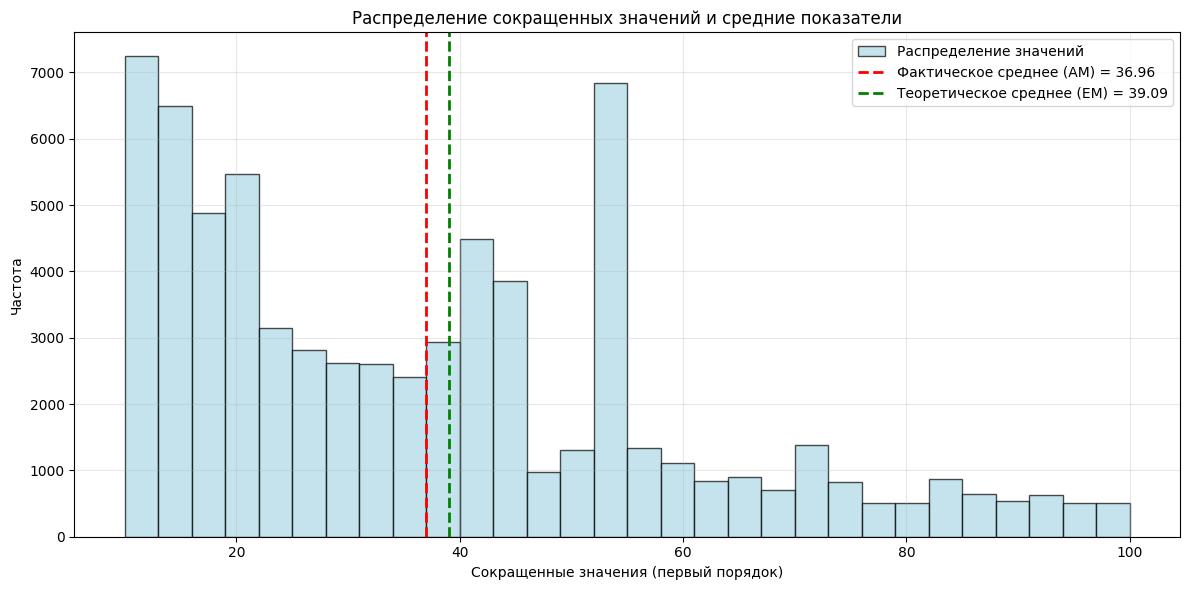

In [22]:
import numpy as np
import math

def run_distortion_coefficient_test(amounts):
    """Запуск теста оценки коэффициента искажения"""
    print("\n" + "="*60)
    print("ОЦЕНКА КОЭФФИЦИЕНТА ИСКАЖЕНИЯ")
    print("="*60)

    if len(amounts) == 0:
        print("✗ Нет данных для теста")
        return

    # Исключить значения <= 10
    filtered_amounts = amounts[amounts > 10]

    if len(filtered_amounts) == 0:
        print("✗ Нет данных после фильтрации (>10)")
        return

    print(f"Объем выборки после фильтрации (>10): {len(filtered_amounts)}")

    # Сокращение до первого порядка
    def reduce_to_first_order(x):
        try:
            log_val = math.log10(x)
            int_part = int(log_val)
            denominator = 10 ** int_part
            return (10 * x) / denominator
        except:
            return None

    reduced_amounts = filtered_amounts.apply(reduce_to_first_order).dropna()
    N = len(reduced_amounts)

    if N == 0:
        print("✗ Нет данных после сокращения до первого порядка")
        return

    # Расчет показателей
    AM = reduced_amounts.mean()  # Фактическое среднее
    EM = 90 / (N * (10 ** (1/N) - 1))  # Теоретическое среднее
    DF = ((AM - EM) / EM) * 100  # Коэффициент искажения (%)
    SD = reduced_amounts.std()   # Стандартное отклонение
    Z = DF / SD if SD != 0 else 0  # Z-статистика

    # Вывод результатов
    print(f"\nРАСЧЕТНЫЕ ПОКАЗАТЕЛИ:")
    print(f"Фактическое среднее (AM): {AM:.4f}")
    print(f"Теоретическое среднее (EM): {EM:.4f}")
    print(f"Коэффициент искажения (DF): {DF:.2f}%")
    print(f"Стандартное отклонение (SD): {SD:.4f}")
    print(f"Z-статистика: {Z:.4f}")

    # Интерпретация результатов
    print(f"\nИНТЕРПРЕТАЦИЯ РЕЗУЛЬТАТОВ:")
    print("-" * 50)

    # Интерпретация среднего значения
    if AM > EM:
        print("✓ Фактическое среднее ВЫШЕ теоретического")
        print("  → Значения в массиве являются ЗАВЫШЕННЫМИ")
    elif AM < EM:
        print("✓ Фактическое среднее НИЖЕ теоретического")
        print("  → Значения в массиве являются ЗАНИЖЕННЫМИ")
    else:
        print("✓ Фактическое среднее СООТВЕТСТВУЕТ теоретическому")
        print("  → Искажения значений не обнаружено")

    # Интерпретация коэффициента искажения
    if abs(DF) < 1:
        distortion_level = "НЕЗНАЧИТЕЛЬНОЕ"
    elif abs(DF) < 5:
        distortion_level = "УМЕРЕННОЕ"
    elif abs(DF) < 10:
        distortion_level = "ЗНАЧИТЕЛЬНОЕ"
    else:
        distortion_level = "СИЛЬНОЕ"

    print(f"✓ Уровень искажения: {distortion_level}")

    # Интерпретация Z-статистики
    if abs(Z) <= 1.96:
        significance = "НЕСУЩЕСТВЕННОЕ"
        conclusion = "Коэффициент искажения статистически не значим"
    elif abs(Z) <= 2.57:
        significance = "СУЩЕСТВЕННОЕ (95%)"
        conclusion = "Коэффициент искажения статистически значим на уровне 95%"
    else:
        significance = "ВЫСОКОСУЩЕСТВЕННОЕ (99%)"
        conclusion = "Коэффициент искажения статистически значим на уровне 99%"

    print(f"✓ Статистическая значимость: {significance}")
    print(f"✓ Вывод: {conclusion}")

    # Детальный анализ
    print(f"\nДЕТАЛЬНЫЙ АНАЛИЗ:")
    print("-" * 30)
    print(f"Объем выборки (N): {N}")
    print(f"Минимальное значение после сокращения: {reduced_amounts.min():.4f}")
    print(f"Максимальное значение после сокращения: {reduced_amounts.max():.4f}")
    print(f"Медиана: {reduced_amounts.median():.4f}")

    # Примеры преобразованных значений
    print(f"\nПРИМЕРЫ ПРЕОБРАЗОВАНИЯ:")
    sample_amounts = filtered_amounts.head(3)
    for amount in sample_amounts:
        reduced = reduce_to_first_order(amount)
        print(f"  {amount:>10.2f} → {reduced:.4f}")

    # Визуализация распределения сокращенных значений
    plot_distribution(reduced_amounts, AM, EM)

def plot_distribution(reduced_amounts, AM, EM):
    """Построение графика распределения сокращенных значений"""
    plt.figure(figsize=(12, 6))

    # Гистограмма распределения
    plt.hist(reduced_amounts, bins=30, alpha=0.7, color='lightblue', edgecolor='black', label='Распределение значений')

    # Вертикальные линии для средних значений
    plt.axvline(AM, color='red', linestyle='--', linewidth=2, label=f'Фактическое среднее (AM) = {AM:.2f}')
    plt.axvline(EM, color='green', linestyle='--', linewidth=2, label=f'Теоретическое среднее (EM) = {EM:.2f}')

    plt.xlabel('Сокращенные значения (первый порядок)')
    plt.ylabel('Частота')
    plt.title('Распределение сокращенных значений и средние показатели')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def calculate_EM_theoretical(N):
    """Расчет теоретического среднего для различных N"""
    if N <= 0:
        return 0
    return 90 / (N * (10 ** (1/N) - 1))

def main():
    """Основная функция"""
    # 1. Подготовка данных
    amounts = prepare_data()


    run_distortion_coefficient_test(amounts)  # Добавьте эту строку

if __name__ == "__main__":
    main()